# Feature Preprocessing

In [1]:
import os
import boto3

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
s3 = boto3.client("s3")

filename = "weight-height.csv"
s3.download_file("sagemaker-ml-bucket-harini-2022", "training-data/weight-height.csv", filename)
df = pd.read_csv(filename)

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
pd.get_dummies(df['Gender'],prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


# Feature Transformations

### 1) Rescale with fixed factor

In [5]:
df['Height'] = df['Height']/12.0
df['Weight'] = df['Weight']/100.0

In [6]:
df.describe().round(2)

,Height,Weight
count,10000.00,10000.00
mean,5.53,1.61
std,0.32,0.32
min,4.52,0.65
25%,5.29,1.36
50%,5.53,1.61
75%,5.76,1.87
max,6.58,2.70


### MinMax normalization

In [8]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00
mean,5.53,1.61,0.47,0.49
std,0.32,0.32,0.16,0.16
min,4.52,0.65,0.00,0.00
25%,5.29,1.36,0.35,0.37
50%,5.53,1.61,0.47,0.49
75%,5.76,1.87,0.60,0.60
max,6.58,2.70,1.00,1.00


In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5.53,1.61,0.47,0.49,-0.00,-0.00
std,0.32,0.32,0.16,0.16,1.00,1.00
min,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,5.76,1.87,0.60,0.60,0.80,0.73
max,6.58,2.70,1.00,1.00,3.38,3.28


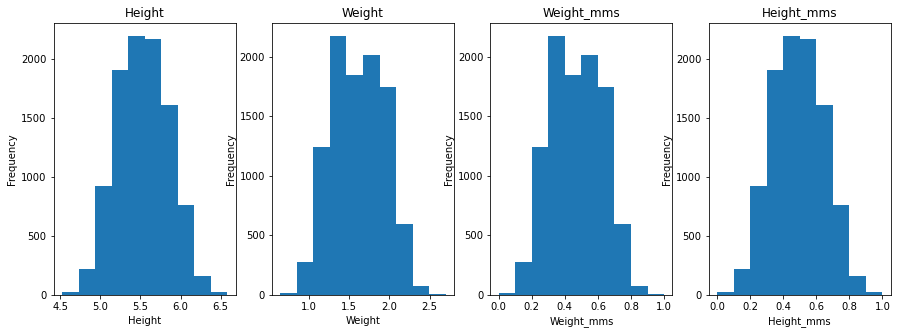

In [14]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height','Weight','Weight_mms','Height_mms']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist',title=feature)
    plt.xlabel(feature)